In [72]:
from spec_id import Likelihood_contours,Median_w_Error,Highest_likelihood_model_JWST
from scipy.interpolate import interp1d
from matplotlib import gridspec
from glob import glob
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
sea.set(style='white')
sea.set(style='ticks')
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [3]:
age = np.arange(0.5,2.1,0.1)
metal = np.arange(0.004,0.028,0.001)
tau = [0, 8.0, 8.48, 8.7, 8.85, 8.95, 9.04, 9.11, 9.18, 9.23, 9.28, 9.32, 9.36, 9.4, 9.43, 9.46]
M,A=np.meshgrid(metal,age)

In [47]:
Z,PZ = np.load('../chidat/z3.717_2_Z_pos.npy')
t,Pt = np.load('../chidat/z3.717_2_t_pos.npy')

(0.019000000000000000001, 0.0019999999999999999999, 0.0019999999999999999999)
(1.0, 0.15399999999999999999, 0.074000000000000000002)


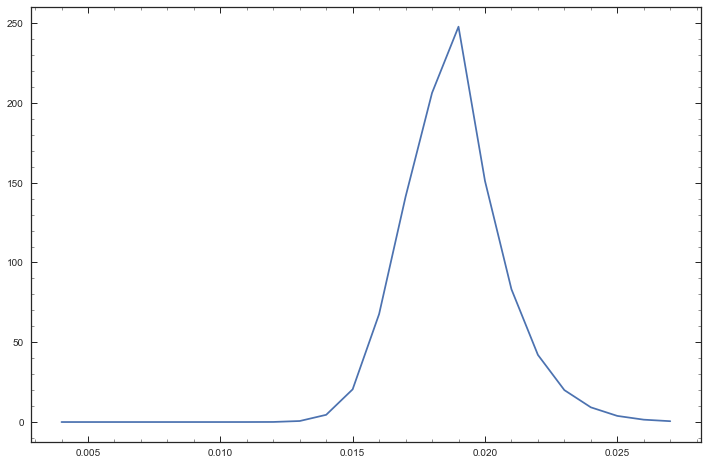

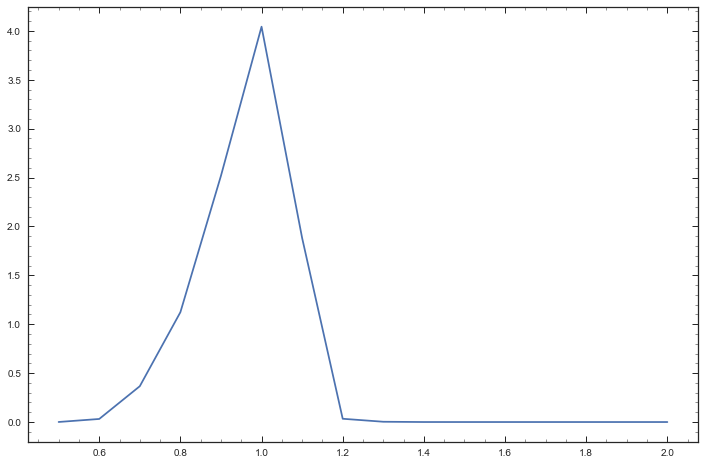

In [48]:
%matplotlib inline

plt.figure(figsize = [12,8])
plt.plot(Z,PZ)

plt.figure(figsize = [12,8])
plt.plot(t,Pt)

print Median_w_Error(PZ,Z)
print Median_w_Error(Pt,t)

In [49]:
###DATA
P = np.load('../chidat/z3.717_2_tZ_pos.npy')
Z,PZ = np.load('../chidat/z3.717_2_Z_pos.npy')
t,Pt = np.load('../chidat/z3.717_2_t_pos.npy')
onesig,twosig = Likelihood_contours(age,metal,P)
levels = np.array([twosig,onesig])

In [52]:
###PLOT
gs = gridspec.GridSpec(2,2,height_ratios=[1,4],width_ratios=[4,1],hspace=0,wspace=0)
plt.figure(figsize=[8,8])

plt.subplot(gs[2])
plt.contour(M,A,P,levels,colors='k',linewidths=2)
plt.contourf(M,A,P,40,cmap=cmap)
plt.axis([0,0.03,0,2])
plt.xlabel('Metallicity (Z$_\odot$)',size=35)
plt.ylabel('Average Age (Gyrs)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xticks([ 0.00475,  0.0095 ,  0.01425,  0.019  ,  0.02375,  0.0285 ],[0.25,.5,0.75,1.0,1.25,1.5])

plt.subplot(gs[0])
plt.plot(Z,PZ)
plt.xticks([])
plt.yticks([])
plt.xlim(0,0.03)
plt.ylim(0,max(PZ))

plt.subplot(gs[3])
plt.plot(Pt,t)
plt.xticks([])
plt.yticks([])
plt.ylim(0,2)
plt.xlim(0,max(Pt))

# plt.show()
plt.savefig('../plots/nirspec_sim_Lh_2.png')
plt.close()

In [53]:
bftau = Highest_likelihood_model_JWST('../data/nirspec_sim.npy',3.717,0.019,1.0,tau)

In [54]:
bftau

(0.019, 1.0, 0)

In [121]:
wv,fl,er = np.load('../data/nirspec_sim.npy')
mwv,mfl = np.load('../JWST/m0.019_a1.0_t0_nirspec.npy')
flx=fl[wv<4.9]+np.random.normal(0,er[wv<4.9])

In [56]:
C = Scale_model(fl[wv<4.9],er[wv<4.9],mfl[wv<4.9])

In [73]:
lowess = sm.nonparametric.lowess

In [133]:
smwv,smfl=lowess(flx,wv[wv<4.9],frac=1/150.).T

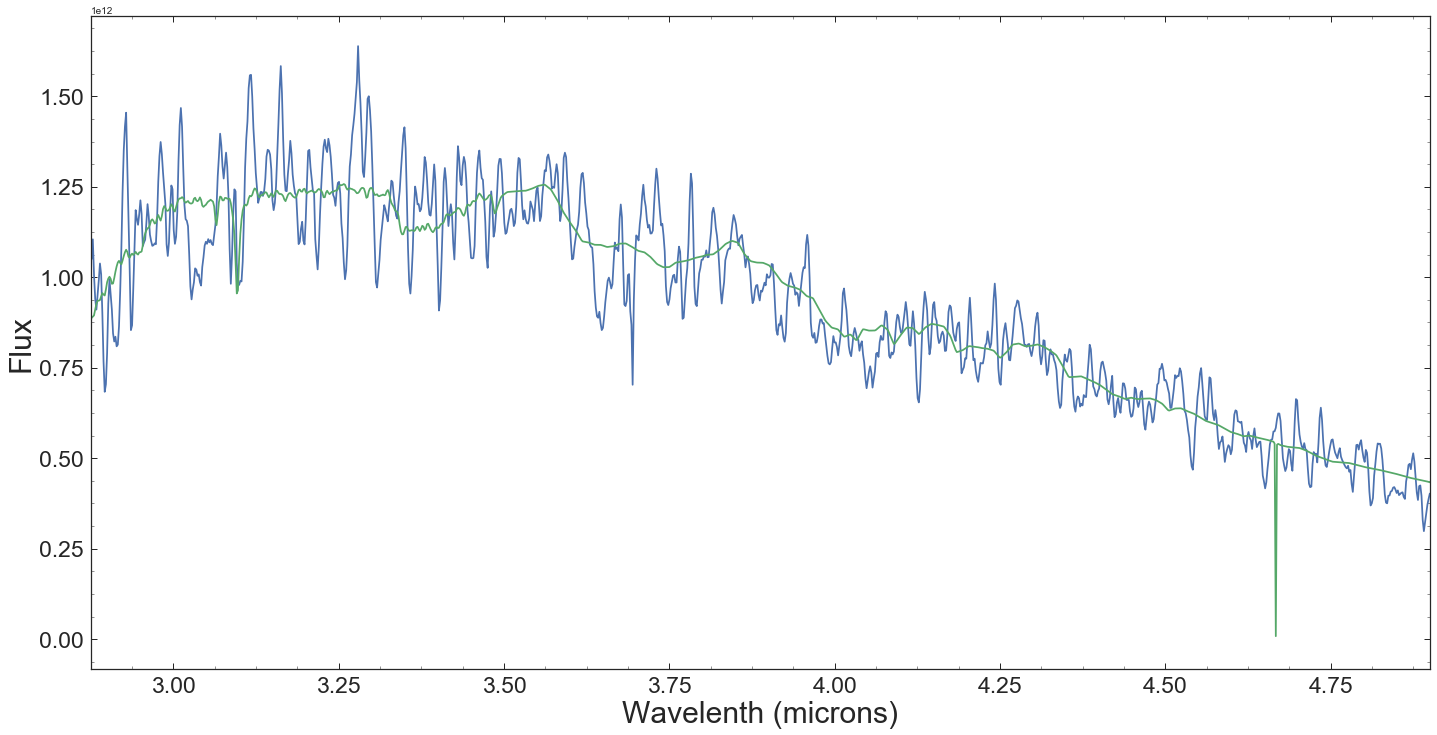

In [134]:
%matplotlib inline


plt.figure(figsize=[24,12])
# plt.plot(wv[wv<4.9],flx,color='k',alpha = .5,label = 'sim')
plt.plot(smwv,smfl)
plt.plot(wv,fl)
# plt.plot(wv[wv<4.9],er[wv<4.9], color='k',alpha = .5,label = 'sim error')
# plt.plot(mwv[wv<4.9],mfl[wv<4.9]*C,'r',label='Median fit,Z=0.02,t=1.0')
plt.xlim(2.875,4.9)
plt.xlabel('Wavelenth (microns)',fontsize=30)
plt.legend(fontsize=30)
plt.ylabel('Flux',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23)
# plt.savefig('../plots/nirspec_sim_spec.png')

In [61]:
mlist,alist = np.load('../mcerr/z3.717_2.npy')

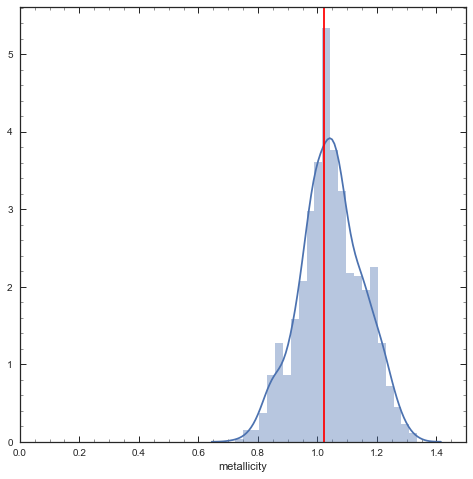

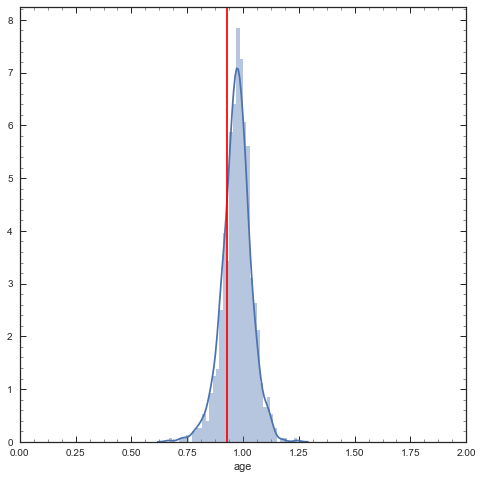

In [138]:
%matplotlib inline

plt.figure(figsize=[8,8])
sea.distplot(mlist/.019)
plt.axvline(0.0194/.019,color= 'r')
plt.xlim(0,1.5)
plt.xlabel('metallicity')
plt.savefig('../plots/nirspec_zdist.png')

plt.figure(figsize=[8,8])
sea.distplot(alist)
plt.axvline(0.93,color= 'r')
plt.xlim(0,2)
plt.xlabel('age')
plt.savefig('../plots/nirspec_tdist.png')